In [217]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import os

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Daily Generated Data

In [218]:
# Read in the Daily_Generated_Data.csv file
daily = pd.read_csv('Daily_Generated_Data.csv')

# For the daily data, calculate the level derivative and the water difference
waterDifference = daily['Total Rainfall']*40452 - daily['Average Flow Rate']*86400
daily['Water Difference'] = waterDifference

# Calculate the derivative of the water level for each day. Don't ask why it's calculated this way - Python was just being a pain.
levelDerivative = []
previous = daily['Average Water Level'][0]
flag = True
for i in daily['Average Water Level']:
    diff = i - previous
    if not flag:
        levelDerivative.append(diff)
    flag = False
    previous = i
levelDerivative.append(0)
daily['level_derivative'] = levelDerivative
daily.describe()

,Total Rainfall,Average Flow Rate,Average Water Level,Water Difference,level_derivative
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,6.809300,6.040909,0.560331,-2.464847e+05,0.000373
std,31.600342,11.998385,0.529876,1.080701e+06,0.373737
min,0.000000,0.006000,0.000000,-1.508275e+07,-4.030000
25%,0.000000,0.330500,0.211500,-5.116566e+05,-0.182000
50%,1.800000,2.357500,0.465500,-8.220960e+04,0.000000
75%,7.600000,7.777750,0.796250,8.712060e+04,0.208000
max,866.000000,216.800000,7.809000,1.985553e+07,4.473000


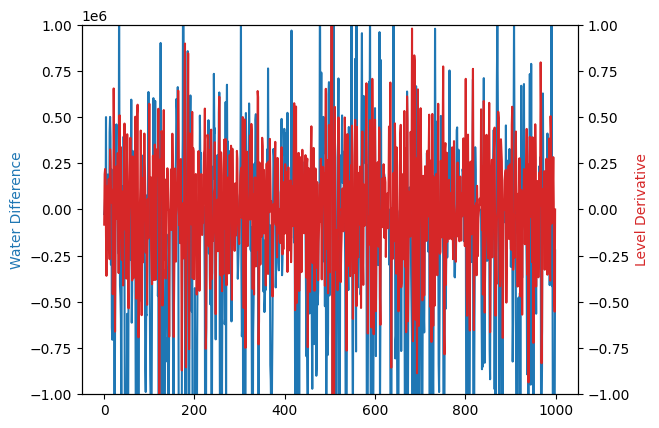

In [219]:
# Plot the water difference and the level derivative against the date with different axis scales
fig, ax1 = plt.subplots()
ax1.plot(daily['Water Difference'].iloc[0:2000])
ax1.set_ylabel('Water Difference', color='tab:blue')
ax1.set_ylim(-1000000, 1000000)
ax2 = ax1.twinx()
ax2.plot(daily['level_derivative'].iloc[0:2000], color='tab:red')
ax2.set_ylabel('Level Derivative', color='tab:red')
ax2.set_ylim(-1, 1)
plt.show()

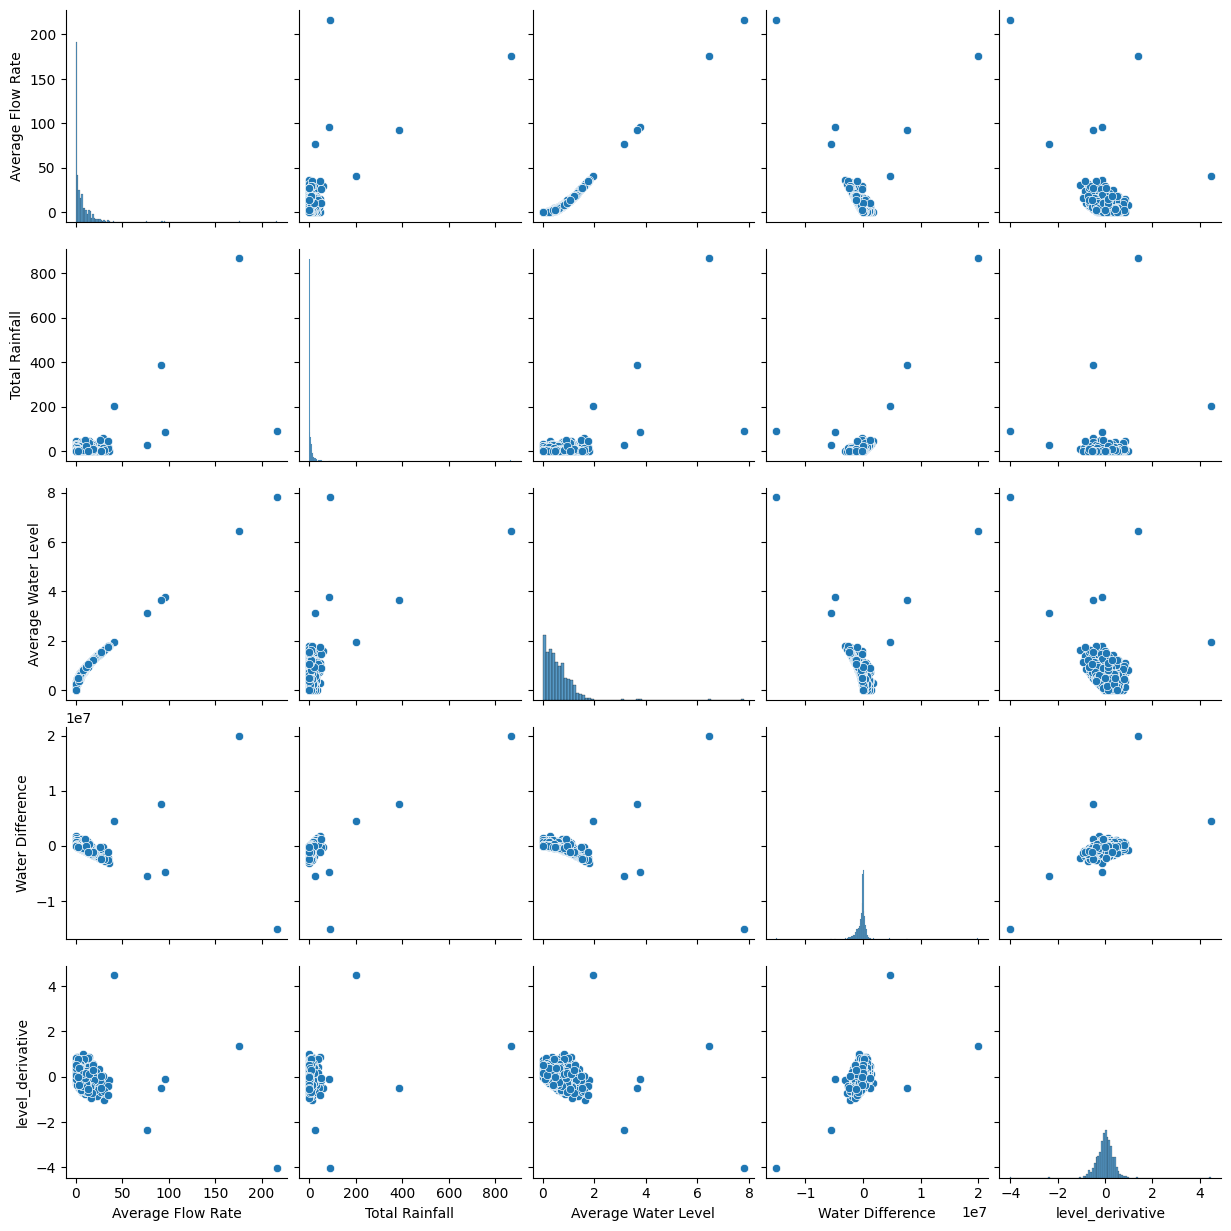

In [220]:
cols = ['Average Flow Rate', 'Total Rainfall', 'Average Water Level', 'Water Difference', 'level_derivative']
sns.pairplot(daily[cols], height=2.5)

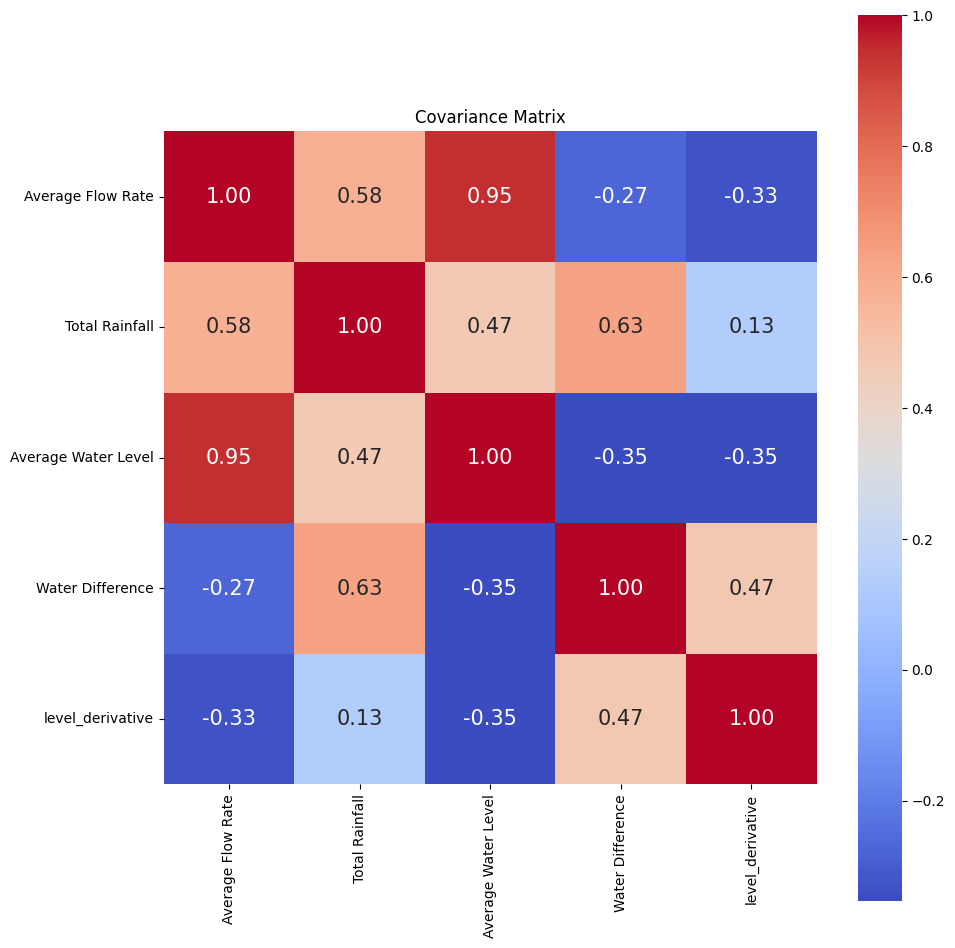

In [221]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(daily[cols].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm', yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

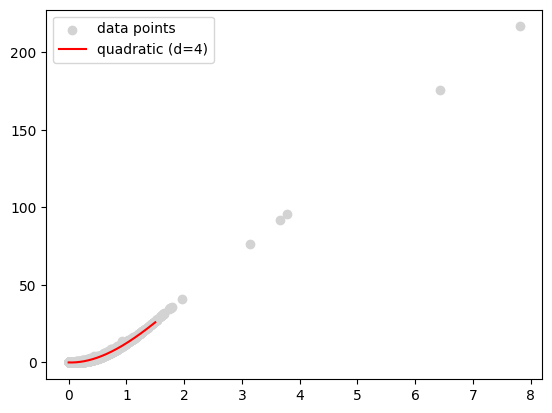

In [222]:
# Fit a polynomial curve to the data
X = daily['Average Water Level'].values.reshape(-1, 1)
y = daily['Average Flow Rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='o')

x = np.linspace(0, 1.5, 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='quadratic (d=4)', color='red')

plt.legend(loc='upper left')
plt.show()

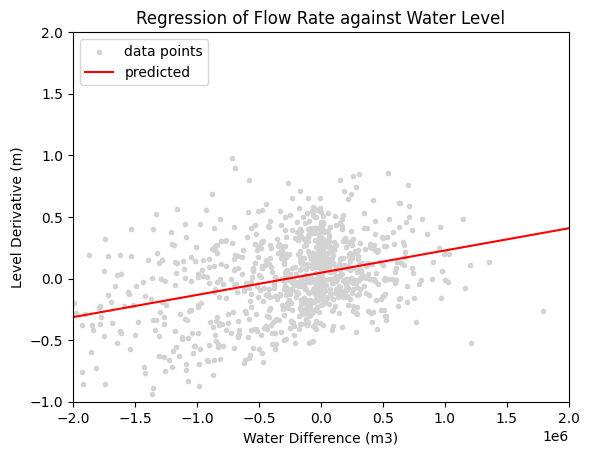

In [223]:
# Remove days with water difference > 2000000 and > 2000000
typical = daily[daily['Water Difference'] < 2000000]
typical = typical[typical['Water Difference'] > -2000000]

# Fit a polynomial curve of Water difference (independent) and level derivative (dependent)
X = typical['Water Difference'].values.reshape(-1, 1)
y = typical['level_derivative'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=1)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='.')

x = np.linspace(-2000000, 2000000, 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='predicted', color='red')

plt.xlim(-2000000, 2000000)
plt.ylim(-1, 2)

plt.legend(loc='upper left')
plt.title('Regression of Flow Rate against Water Level')
plt.xlabel('Water Difference (m3)')
plt.ylabel('Level Derivative (m)')
plt.show()

# Quarter-Hourly Generated Data

In [224]:
# Read in the Quarter_Hourly_Generated_Data.csv file
quarter_hourly = pd.read_csv('Quarter_Hourly_Generated_Data.csv')

waterDifference = quarter_hourly['Rainfall']*40452 - quarter_hourly['Flow Rate']*900
quarter_hourly['Water Difference'] = waterDifference

levelDerivative = []
previous = quarter_hourly['Water Level'][0]
flag = True
for i in quarter_hourly['Water Level']:
    diff = i - previous
    if not flag:
        levelDerivative.append(diff)
    flag = False
    previous = i
levelDerivative.append(0)
quarter_hourly['level_derivative'] = levelDerivative
quarter_hourly.describe()

,Rainfall,Flow Rate,Water Level,Water Difference,level_derivative
count,96000.000000,96000.000000,96000.000000,9.600000e+04,96000.000000
mean,0.070930,6.040909,0.560336,-2.567549e+03,-0.000003
std,1.118568,12.667432,0.558980,4.440377e+04,0.006493
min,0.000000,0.000000,0.000000,-2.569968e+05,-0.049000
25%,0.000000,0.017000,0.174000,-6.223500e+03,-0.003000
50%,0.000000,2.005000,0.471000,-1.209600e+03,0.000000
75%,0.000000,7.975250,0.826250,-8.100000e+00,0.004000
max,90.000000,285.552000,10.101000,3.423249e+06,0.078000


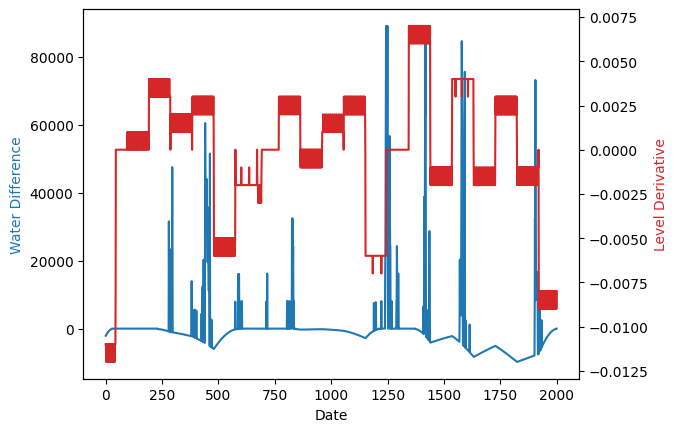

In [225]:
# Plot the water difference and the level derivative against the date with different axis scales
fig, ax1 = plt.subplots()
ax1.plot(quarter_hourly['Water Difference'].iloc[0:2000])
ax1.set_xlabel('Date')
ax1.set_ylabel('Water Difference', color='tab:blue')
ax2 = ax1.twinx()
ax2.plot(quarter_hourly['level_derivative'].iloc[0:2000], color='tab:red')
ax2.set_ylabel('Level Derivative', color='tab:red')
plt.show()

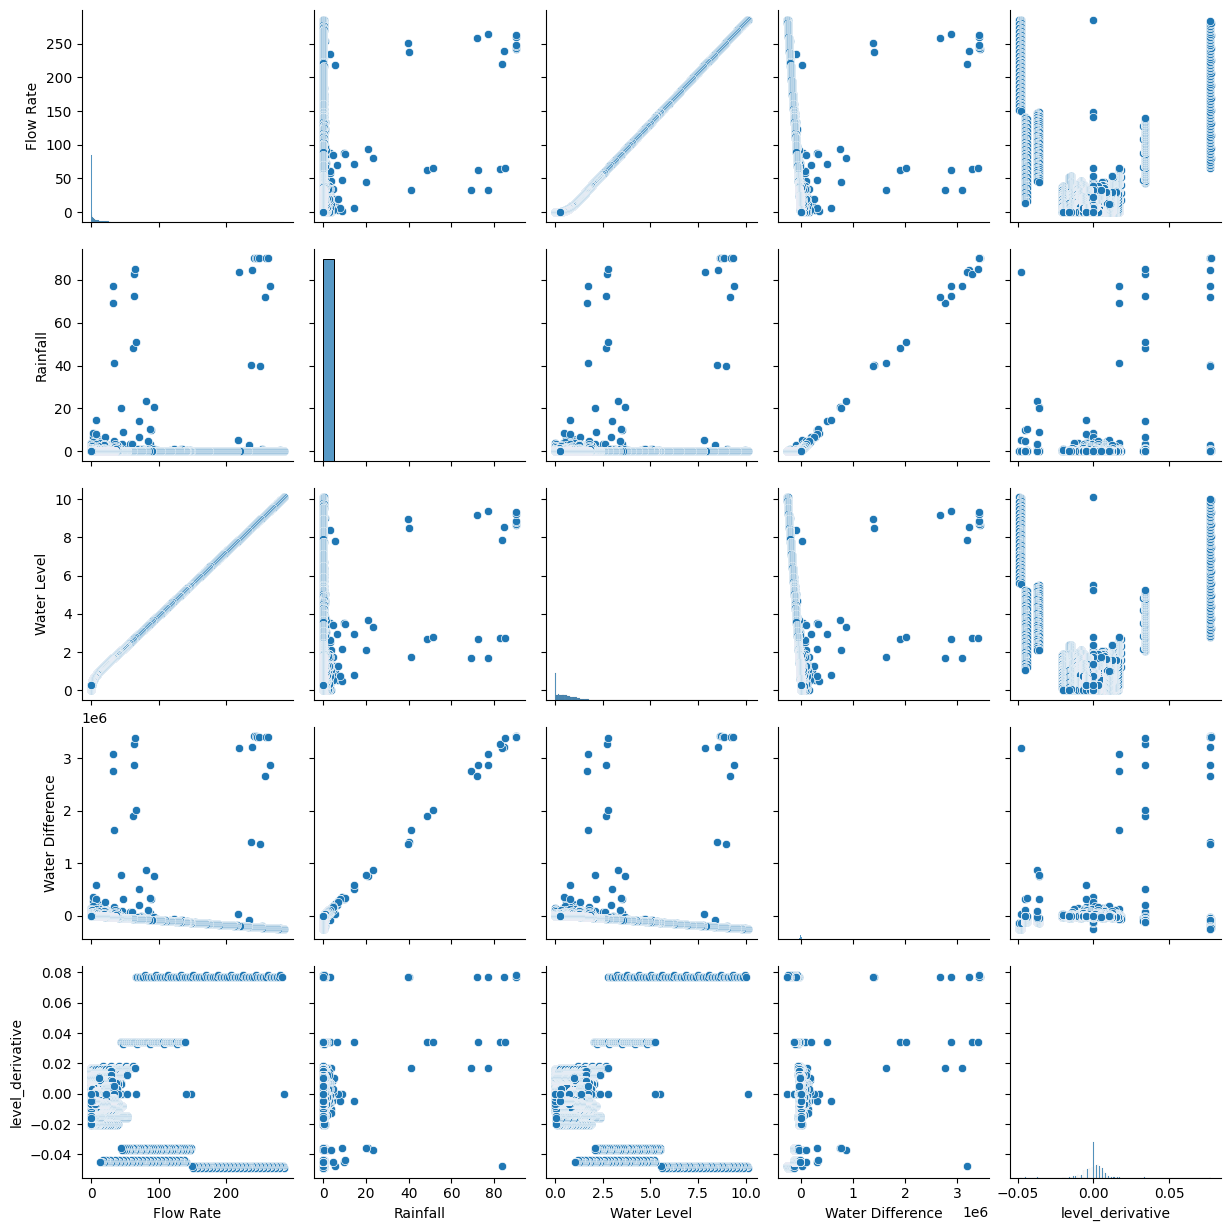

In [226]:
cols = ['Flow Rate', 'Rainfall', 'Water Level', 'Water Difference', 'level_derivative']
sns.pairplot(quarter_hourly[cols], height=2.5)

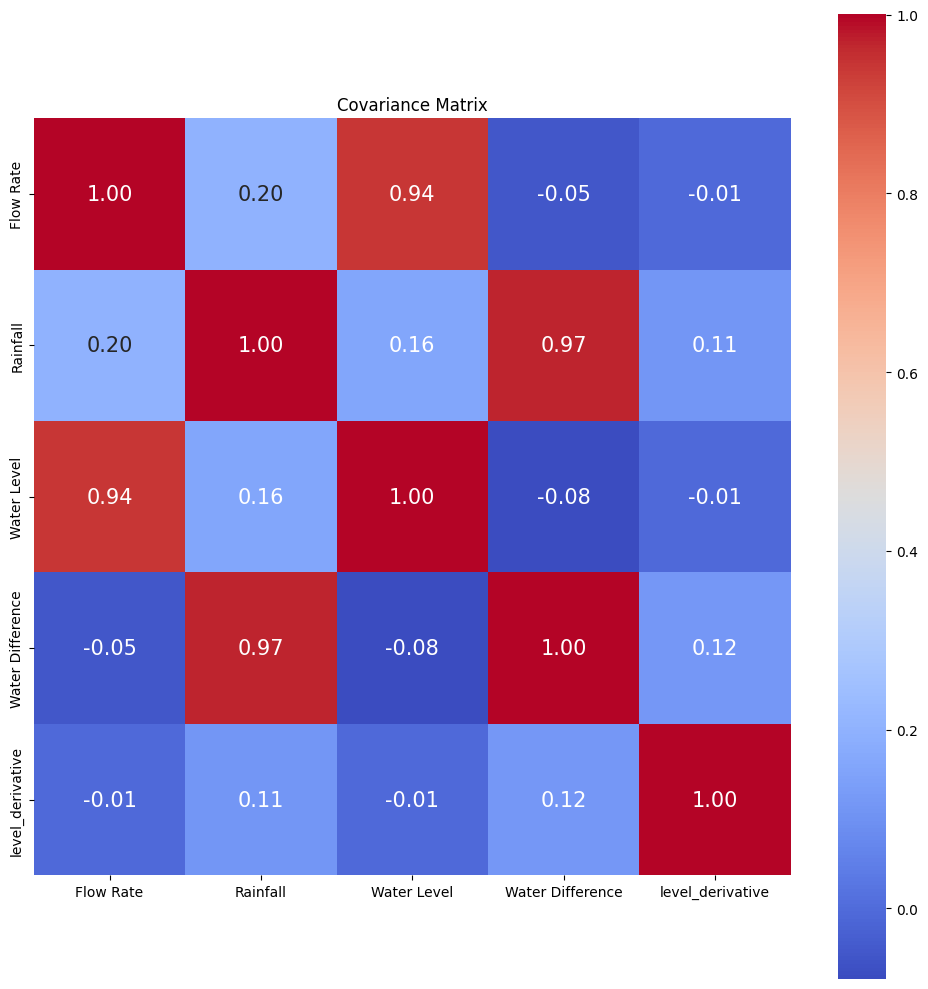

In [227]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(quarter_hourly[cols].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm', yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

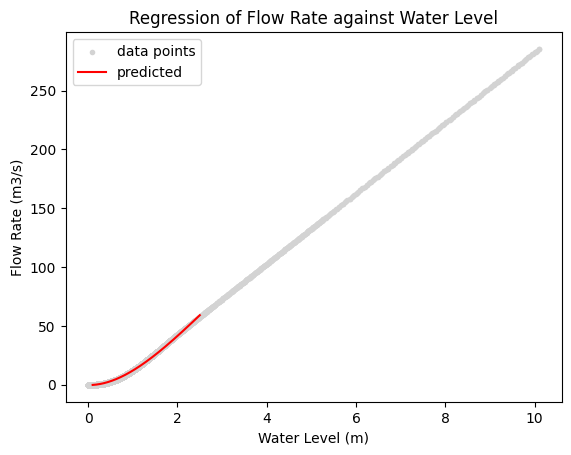

In [228]:
# Fit a polynomial curve to the data
X = quarter_hourly['Water Level'].values.reshape(-1, 1)
y = quarter_hourly['Flow Rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='.')

x = np.linspace(0.1, 2.5, 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='predicted', color='red')

plt.legend(loc='upper left')
plt.title('Regression of Flow Rate against Water Level')
plt.xlabel('Water Level (m)')
plt.ylabel('Flow Rate (m3/s)')
plt.show()